# PANDAS

_autor: Robert Moreno Carrillo_ 

Pandas es una librería de Python utilizada el manejo y análisis de grandes cantidades de datos organizados, ofrece una gran facilidad en el trabajo con hojas de cálculos y esta se maneja mediante DataFrames y Series.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### De diccionario a DataFrame

Es posible convertir a un diccionario del tipo {"clave1" : [v1,v2,..,vn] , "clave2" : [z1,z2,..,zn]... } usando pd.DataFrame()

In [8]:
diccionario={"Nombre":["Robert", "Denisse", "Carlos"], "Edad":[20,20,19]}
DataF=pd.DataFrame(diccionario)
DataF

,Nombre,Edad
0,Robert,20
1,Denisse,20
2,Carlos,19


Es posible anadir una columna de la misma forma que un diccionario nombreDataframe["nombreColumnaNueva"]=ListaDeValores

In [15]:
DataF["Semestre"]=[4,3,3]
DataF

,Nombre,Edad,Semestre
0,Robert,20,4
1,Denisse,20,3
2,Carlos,19,3


Para seleccionar varias columnas del dataFrame se lo puede hacer mediante una lista del nombre de las columnas
nombreDataframe[[nomColumna1, nomColumna2,...]]

In [12]:
DataF[["Nombre", "Semestre"]] # Solo selecciono la columna Nombre y Semestre

,Nombre,Semestre
0,Robert,4
1,Denisse,3
2,Carlos,3


Es posible eliminar una columan utilizando del 

In [16]:
#del DataF["Semestre"]

In [18]:
DataF

,Nombre,Edad
0,Robert,20
1,Denisse,20
2,Carlos,19


### Leer archivo csv con pandas:
Por defecto se utiliza de separador la coma, pero en caso de tener otro separador utilizamos el parámetro "sep"
Ejemplo:
DF=pd.read_csv("nombre_de_archivo.csv", sep=";") 


In [2]:
servings= pd.read_csv("bebidas.csv", sep=",") 

La funcion head(n) retorna las n primeras filas del DataFrame, y tail(n) retorna las n ultimas filas, por defecto n es 5

In [19]:
servings.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


### Datos Estadísticos:

Es posible obtener una serie de datos estadisticos de una columna mediante .describe(), incluye cantidad, promedio, desviacion estandar, min, max y cuartiles

In [7]:
servings["beer_servings"].describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

 También es posible obtener estas medidas individualmente por ejemplo .max(), .mean() , .std()

In [5]:
servings["beer_servings"].mean()

106.16062176165804

### Es posible hacer filtrado de filas mediante condiciones al igual que en numpy:

In [21]:
condicion1 = servings["continent"]=="EU" #voy a filtrar los registros solo del continente Europeo
servings[condicion1].head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [27]:
condicion2 = servings["beer_servings"]> servings["beer_servings"].mean() #filtra que se presenten valores mayores al promedio en beer_servings
servings[condicion1 & condicion2].head() #es posible aplicar más de una condiciones mendiante el operador "&" como and y "|" como or

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
9,Austria,279,75,191,9.7,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
25,Bulgaria,231,252,94,10.3,EU


Tambien es posible hace operaciones con las filas (sumar, multiplicar, dividir, entre otras..) aplicandolas a las columas directamente

### Groupby:
Funciona para agrupar y trabajar con una seccion específica una funcion en específico(sum, max, min, mean)

In [8]:
servings.groupby("continent").mean() #promedio

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [19]:
servings.groupby("continent").sum() #suma

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,3258,866,862,159.4
AS,1630,2677,399,95.5
EU,8720,5965,6400,387.8
OC,1435,935,570,54.1
SA,2101,1377,749,75.7


### Agregar nueva columna:
Simplemente se asigna a un nuevo nombre de columna una serie.


In [20]:
servings["wine_beer"]= servings["wine_servings"] + servings["beer_servings"]
prom=servings["spirit_servings"].mean()
servings["spirit_promedio"]=(servings["spirit_servings"]/prom)
servings.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_beer,spirit_promedio
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,143,1.629734
2,Algeria,25,0,14,0.7,AF,39,0.000000
3,Andorra,245,138,312,12.4,EU,557,1.703813
4,Angola,217,57,45,5.9,AF,262,0.703749


# ILOC:
Utilizado para indexacion/seleccion basada en la ubicacion de numeros enteros por posicion:
sintaxis: data.iloc(seleccion_de_filas,seleccion_de_columnas)


In [21]:
#servings.iloc[0:45,[1,2,5]] filas del 0 al 44, y columnas 1 2 y 5

# Concatener Datos:

pd.concat([df1,df2,df3,df4,...,dfn])


In [29]:
df1=servings["country"][:10]
df1.head()

0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: country, dtype: object

In [31]:
df2=servings["country"][10:30]
df2.head()

10    Azerbaijan
11       Bahamas
12       Bahrain
13    Bangladesh
14      Barbados
Name: country, dtype: object

In [32]:
df3=servings["country"][30:70]
df3.tail()

65      Germany
66        Ghana
67       Greece
68      Grenada
69    Guatemala
Name: country, dtype: object

In [34]:
#pd.concat([df1,df2,df3]) #se concatena uno debajo de otro

# Ordenar Datos:

In [26]:
Sorted= servings.sort_values(["beer_servings"], ascending=False)
#Por defecto asciende de menor a mayor
Sorted.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_beer,spirit_promedio
117,Namibia,376,3,1,6.8,AF,377,0.037039
45,Czech Republic,361,170,134,11.8,EU,495,2.098900
62,Gabon,347,98,59,8.9,AF,406,1.209954
65,Germany,346,117,175,11.3,EU,521,1.444537
98,Lithuania,343,244,56,12.9,EU,399,3.012538


In [30]:
servings=servings.reset_index()
servings.set_index("country").loc[["Germany","Spain"]] #cambiamos el indice de numeros a paises

,level_0,index,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_beer,spirit_promedio
country,,,,,,,,,
Germany,65,65,346,117,175,11.3,EU,521,1.444537
Spain,160,160,284,157,112,10.0,EU,396,1.938396


In [32]:
servings.set_index("country").loc[["Germany","Spain"], ["beer_servings","wine_servings"]]

,beer_servings,wine_servings
country,,
Germany,346,175
Spain,284,112


# GRAFICAS:


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=servings.groupby("continent").mean().reset_index()
df

,continent,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,AF,61.471698,16.339623,16.264151,3.007547
1,AS,37.045455,60.840909,9.068182,2.170455
2,EU,193.777778,132.555556,142.222222,8.617778
3,OC,89.687500,58.437500,35.625000,3.381250
4,SA,175.083333,114.750000,62.416667,6.308333


## Graficación en Seaborn 

## Boxplot:

Text(0,0.5,'NOMBRE PARA EL EJE Y')

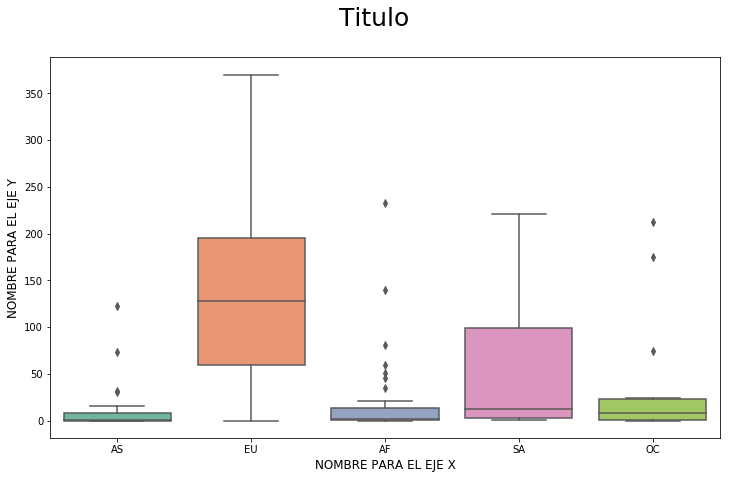

In [46]:
a4_dims = (12,7) #dimensiones del grafico
fig, ax = plt.subplots(figsize=a4_dims)
plt.suptitle('Titulo',size=25) 

sns.boxplot(x="continent", y="wine_servings", data=servings, palette="Set2") # Linea IMPORTANTE
# x: valores del eje x (nombre de la columna)
# y: valores del eje y (nombre de la columna)
# data: en este caso el nombre del dataframe
# palette: se puede omitir, maneja simplemente los colores, pueden encontrar más palette en la página oficial de seaborn 

plt.xlabel("NOMBRE PARA EL EJE X", size=12) # le da nombre al eje x
plt.ylabel("NOMBRE PARA EL EJE Y", size=12) # le da nombre al eje y
#plt.savefig("archivo.png")   # Guardar en formato .png
#plt.savefig("archivo.pdf")   # Guardar en formato .pdf

#plt.show()  #Si se trabaja en pycharm es necesario colocar esta linea para visualizar la grafica

## Barplot:

Text(0,0.5,'NOMBRE PARA EL EJE Y')

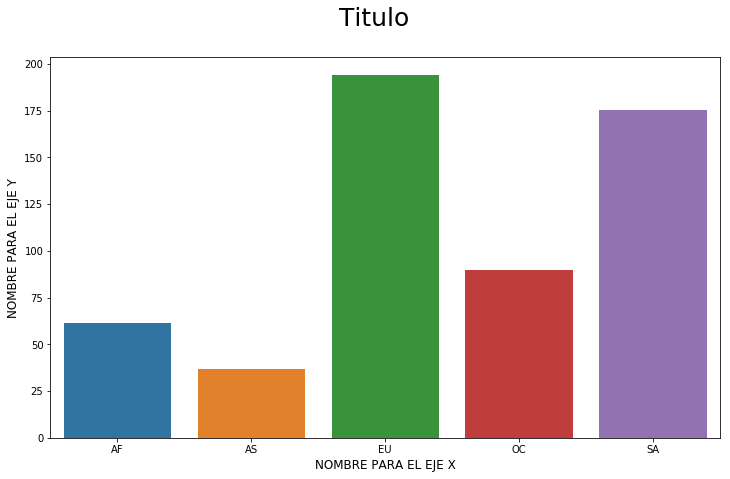

In [47]:
a4_dims = (12,7) #dimensiones del grafico
fig, ax = plt.subplots(figsize=a4_dims)
plt.suptitle('Titulo',size=25) 

sns.barplot(x="continent", y="beer_servings", data=df)
plt.xlabel("NOMBRE PARA EL EJE X", size=12) # le da nombre al eje x
plt.ylabel("NOMBRE PARA EL EJE Y", size=12) # le da nombre al eje y

## Lineplot:

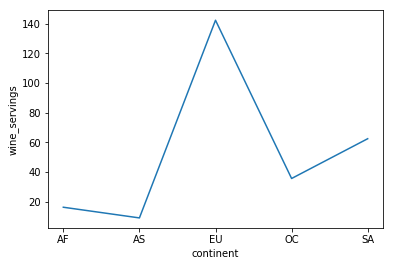

In [48]:
sns.lineplot(x="continent", y="wine_servings", data=df)

### Otra graficas
_autor: Denisse Orozco_

__PieChart__

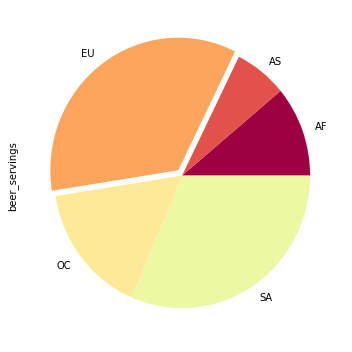

In [56]:
df2=df.set_index("continent")
explode = (0, 0, 0.05, 0, 0)  # explode 3rd slice
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
df2["beer_servings"].plot(kind="pie", figsize=(5, 5), colors= colors, explode= explode)

plt.tight_layout()

VARIOS GRAFICOS EN UNA MISMA VENTANA

Text(0.5,0.98,'Promedio del consumo de vino por continentes')

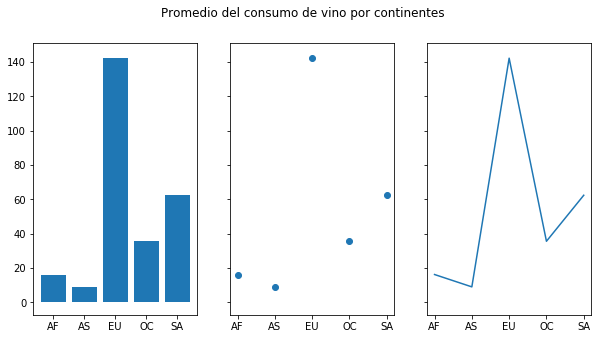

In [54]:
names =  df["continent"]
values= df["wine_servings"]

fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
axs[0].bar(names, values, )
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle("Promedio del consumo de vino por continentes")